# **Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Library**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Puntadewa - Dataset.csv')
print(df.to_string())

        Minggu                Produk  Jumlah Terjual  Harga Satuan (Rp)  Total Pendapatan (Rp)
0     Minggu 1           Air Mineral              72               4000               288000.0
1     Minggu 1                Burger              18               7000               126000.0
2     Minggu 1          Cappucino Es              39               6000               234000.0
3     Minggu 1      Cappucino Hangat               6               5000                30000.0
4     Minggu 1             Coklat Es              16               6000                96000.0
5     Minggu 1         Coklat Hangat               6               5000                30000.0
6     Minggu 1              Gorengan             188               2000               376000.0
7     Minggu 1           Jahe Hangat               5               5000                25000.0
8     Minggu 1              Jeruk Es              31               6000               186000.0
9     Minggu 1          Jeruk Hangat              

# **Data Preprocessing**

In [ ]:
product_summary = df.groupby("Produk").agg(
    Jumlah_Total_Terjual=("Jumlah Terjual", "sum"),
    Harga_Satuan=("Harga Satuan (Rp)", "first"),
    Jumlah_Total_Pendapatan=("Total Pendapatan (Rp)", "sum")
).reset_index()

# **Feature Scaling and Clustering the data using K Means Clustering**

In [ ]:
product_summary["Total_Pendapatan_Per_Penjualan"] = product_summary["Jumlah_Total_Pendapatan"] / product_summary["Jumlah_Total_Terjual"]

scaler = StandardScaler()
features = product_summary[["Jumlah_Total_Terjual", "Harga_Satuan", "Total_Pendapatan_Per_Penjualan"]]
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
product_summary["Cluster"] = kmeans.fit_predict(scaled_features)

print(product_summary)

                  Produk  Jumlah_Total_Terjual  Harga_Satuan  \
0            Air Mineral                   640          4000   
1                 Burger                    70          7000   
2           Cappucino Es                   274          6000   
3       Cappucino Hangat                    57          5000   
4              Coklat Es                   104          6000   
5          Coklat Hangat                    39          5000   
6               Gorengan                  1731          2000   
7                Jahe Es                     7          6000   
8            Jahe Hangat                   189          5000   
9               Jeruk Es                   236          6000   
10          Jeruk Hangat                   114          5000   
11                Joshua                   261          7000   
12              Jus Buah                   144          7000   
13                 Kebab                    66         10000   
14        Kentang Goreng                

# **Plot the data**

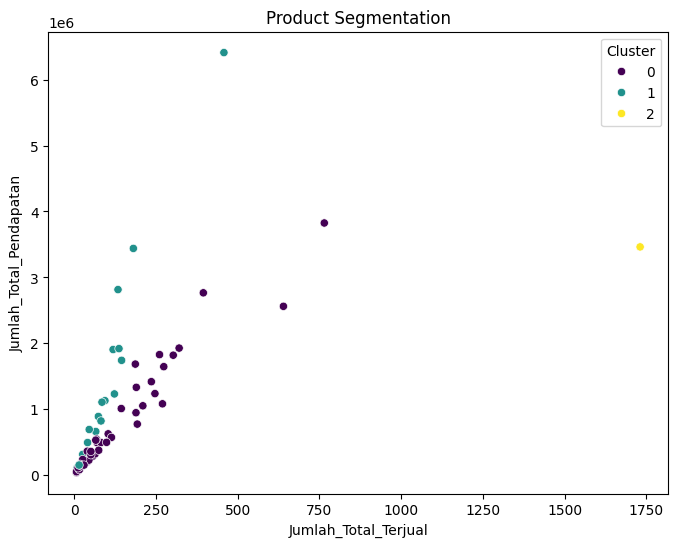

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=product_summary["Jumlah_Total_Terjual"],
    y=product_summary["Jumlah_Total_Pendapatan"],
    hue=product_summary["Cluster"],
    palette="viridis"
)
plt.title("Product Segmentation")
plt.xlabel("Jumlah_Total_Terjual")
plt.ylabel("Jumlah_Total_Pendapatan")
plt.legend(title="Cluster")
plt.show()